In [3]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom
import cv2

# Define paths
dataset_path = "D:/kits23/dataset/"  # Root directory containing case folders
output_path = "D:/kits23/resampled_and_sliced_segmentation_files"  # Path to save processed segmentation files
os.makedirs(output_path, exist_ok=True)

def resample_image(image, original_spacing, target_spacing=(1.0, 1.0, 1.0)):
    """
    Resample the image to ensure uniform voxel spacing.
    :param image: 3D numpy array of the image data.
    :param original_spacing: Original voxel spacing as a tuple (x, y, z).
    :param target_spacing: Desired target spacing as a tuple (x, y, z).
    :return: Resampled 3D numpy array.
    """
    # Compute the resize factors for each axis
    resize_factors = np.array(original_spacing) / np.array(target_spacing)
    new_shape = np.round(np.array(image.shape) * resize_factors).astype(int)
    
    # Rescale the image
    resampled_image = zoom(image, resize_factors, order=1)
    return resampled_image

def slice_image(image, target_size=(512, 512)):
    """
    Convert 3D volumes into 2D slices and resize to 512x512.
    :param image: 3D numpy array of the image data.
    :param target_size: Desired target size for each slice (default 512x512).
    :return: List of 2D slices (each slice is a 512x512 array).
    """
    slices = []
    for i in range(image.shape[0]):  # Iterate through each slice (along the first axis)
        slice_2d = image[i, :, :]
        # Resize the slice to the target size (512x512)
        resized_slice = cv2.resize(slice_2d, target_size, interpolation=cv2.INTER_LINEAR)
        slices.append(resized_slice)
    return np.array(slices)

def process_segmentation_files(dataset_path, output_path, target_spacing=(1.0, 1.0, 1.0), target_size=(512, 512)):
    """
    Process the segmentation files by resampling and slicing (without windowing).
    :param dataset_path: Path to the root dataset folder containing case folders.
    :param output_path: Path to save processed segmentation files.
    :param target_spacing: Desired voxel spacing (default is 1.0 mm).
    :param target_size: Desired slice size (default is 512x512).
    """
    for case_folder in sorted(os.listdir(dataset_path)):
        case_path = os.path.join(dataset_path, case_folder)
        
        # Ensure that we only process folders containing segmentation files
        segmentation_file = os.path.join(case_path, "segmentation.nii.gz")
        if not os.path.exists(segmentation_file):
            continue

        output_file = os.path.join(output_path, f"{case_folder}_segmentation_resampled_and_sliced.nii.gz")

        # Skip processing if output file already exists (resumption)
        if os.path.exists(output_file):
            print(f"Skipping {case_folder}, already processed.")
            continue

        print(f"Processing {case_folder}...")

        # Load the segmentation file
        segmentation_obj = nib.load(segmentation_file)
        segmentation_data = segmentation_obj.get_fdata()

        # Get the original spacing (assuming the spacing is uniform in x, y, and z directions)
        original_spacing = segmentation_obj.header.get_zooms()[:3]

        # Resample the segmentation data to the target spacing
        resampled_segmentation = resample_image(segmentation_data, original_spacing, target_spacing)

        # Convert the 3D volume into 2D slices and resize to 512x512
        slices = slice_image(resampled_segmentation, target_size)

        # Save the processed slices as a new NIfTI file
        slices_nifti = nib.Nifti1Image(slices, affine=segmentation_obj.affine)
        nib.save(slices_nifti, output_file)

        print(f"Processed and saved {case_folder}_segmentation_resampled_and_sliced.nii.gz")

# Run the processing function for segmentation files
process_segmentation_files(dataset_path, output_path)


Processing case_00000...
Processed and saved case_00000_segmentation_resampled_and_sliced.nii.gz
Processing case_00001...
Processed and saved case_00001_segmentation_resampled_and_sliced.nii.gz
Processing case_00002...
Processed and saved case_00002_segmentation_resampled_and_sliced.nii.gz
Processing case_00003...
Processed and saved case_00003_segmentation_resampled_and_sliced.nii.gz
Processing case_00004...
Processed and saved case_00004_segmentation_resampled_and_sliced.nii.gz
Processing case_00005...
Processed and saved case_00005_segmentation_resampled_and_sliced.nii.gz
Processing case_00006...
Processed and saved case_00006_segmentation_resampled_and_sliced.nii.gz
Processing case_00007...
Processed and saved case_00007_segmentation_resampled_and_sliced.nii.gz
Processing case_00008...
Processed and saved case_00008_segmentation_resampled_and_sliced.nii.gz
Processing case_00009...
Processed and saved case_00009_segmentation_resampled_and_sliced.nii.gz
Processing case_00010...
Proce

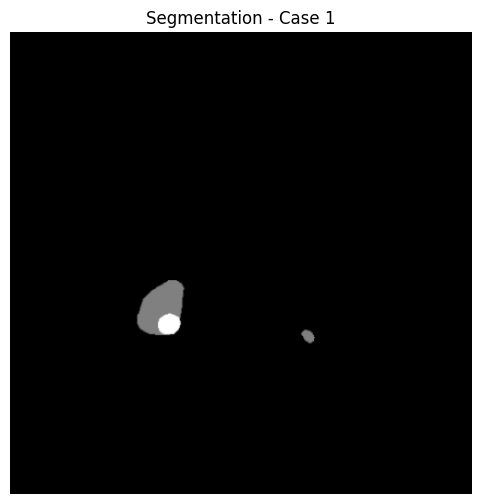

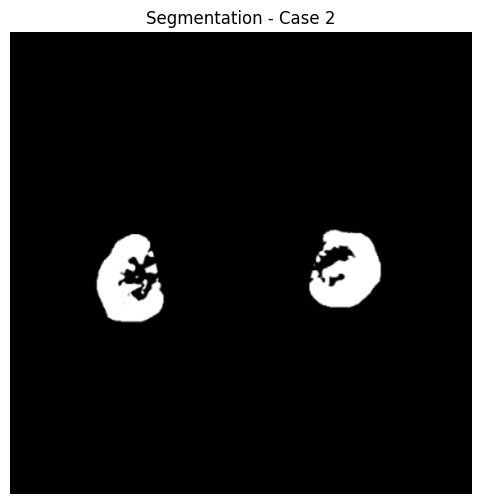

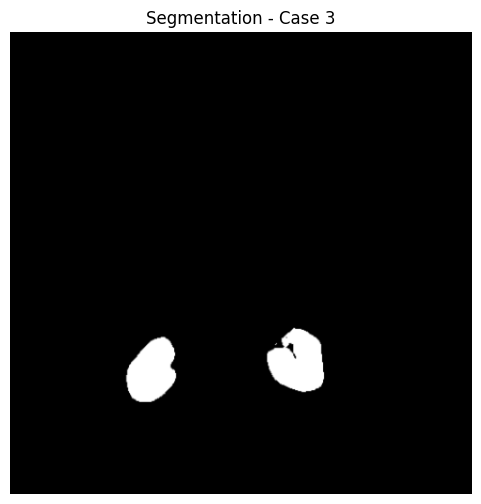

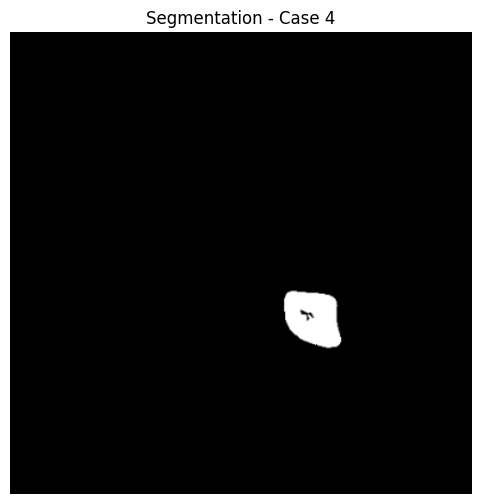

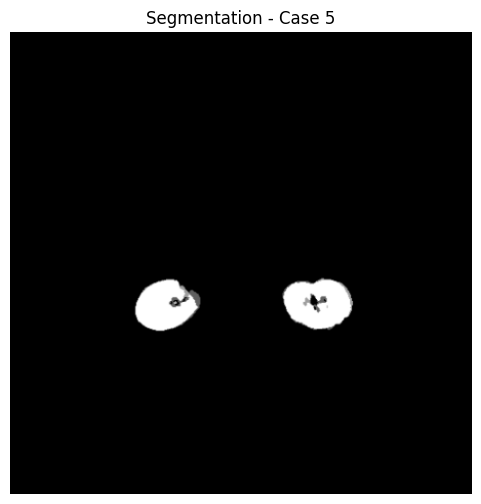

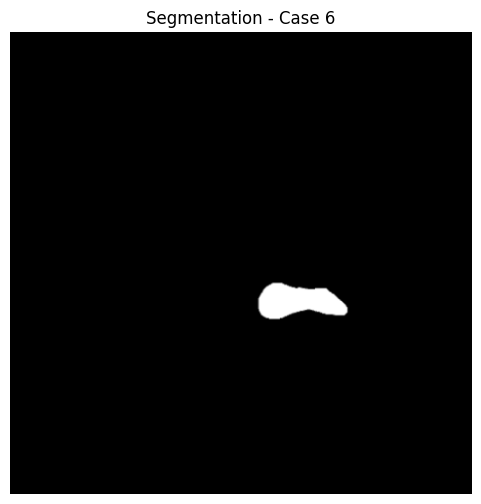

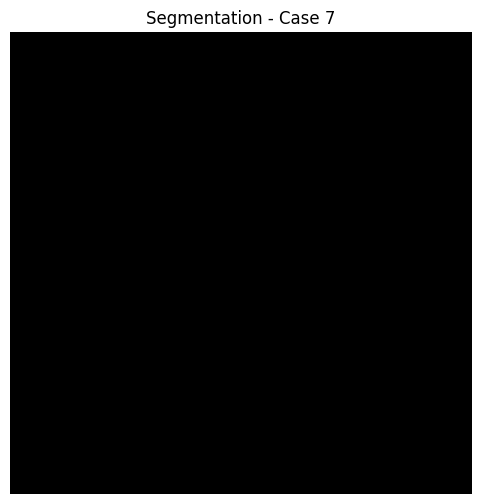

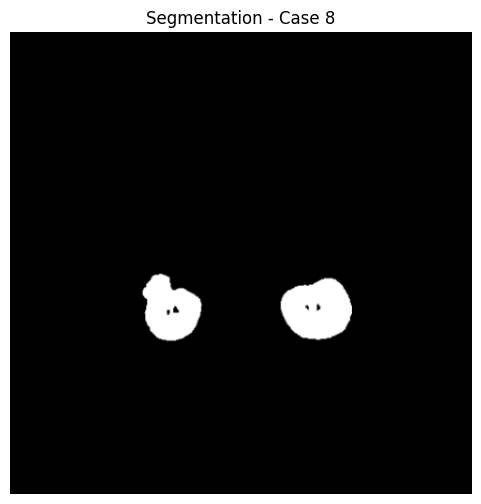

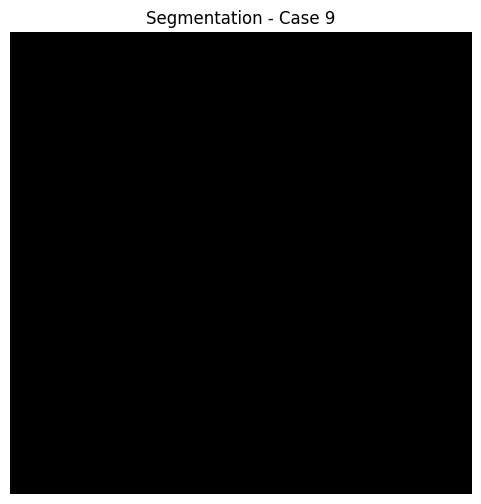

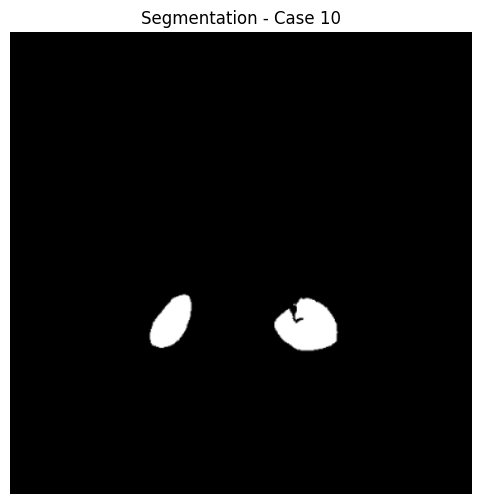

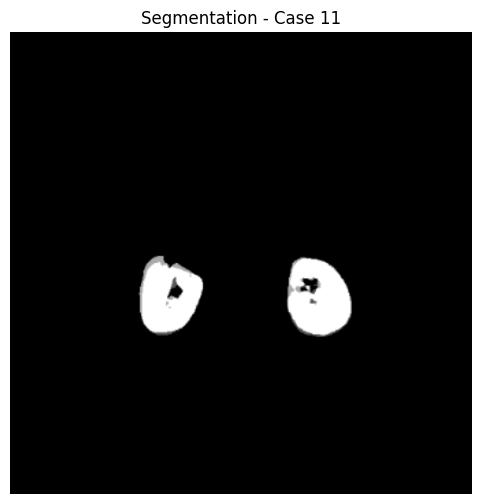

In [4]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths
output_path = "D:/kits23/resampled_and_sliced_segmentation_files"  # Path to your resampled segmentation files

def visualize_resampled_segmentation(output_path, num_cases=11):
    """
    Visualizes the resampled segmentation slices for the first 'num_cases' cases.
    :param output_path: Path to the folder containing the processed segmentation files.
    :param num_cases: Number of cases to visualize (default is 11).
    """
    # Get the list of processed segmentation files
    processed_files = sorted(os.listdir(output_path))
    
    for case_idx in range(min(num_cases, len(processed_files))):
        case_file = processed_files[case_idx]
        case_path = os.path.join(output_path, case_file)

        # Load the segmentation file
        segmentation_obj = nib.load(case_path)
        segmentation_data = segmentation_obj.get_fdata()

        # Visualize the middle slice of the segmentation
        middle_slice_idx = segmentation_data.shape[0] // 2
        middle_slice = segmentation_data[middle_slice_idx, :, :]

        # Plot the middle slice
        plt.figure(figsize=(6, 6))
        plt.imshow(middle_slice, cmap="gray")
        plt.title(f"Segmentation - Case {case_idx + 1}")
        plt.axis("off")  # Hide axes
        plt.show()

# Run the visualization function
visualize_resampled_segmentation(output_path, num_cases=11)


In [5]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths
output_path = "D:/kits23/resampled_and_sliced_segmentation_files"  # Path to your resampled segmentation files
save_path = "D:/kits23/segmentation_visualizations"  # Path to save the visualized images
progress_file = "D:/kits23/segmentation_progress.txt"  # Path to the progress file

os.makedirs(save_path, exist_ok=True)

def load_progress():
    """Load progress from the progress file (if it exists)."""
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            processed_cases = [line.strip() for line in f.readlines()]
        return processed_cases
    return []

def save_progress(processed_cases):
    """Save progress to the progress file."""
    with open(progress_file, 'w') as f:
        for case in processed_cases:
            f.write(f"{case}\n")

def visualize_and_save_resampled_segmentation(output_path, save_path, num_cases=11):
    """
    Visualizes and saves the resampled segmentation slices for the first 'num_cases' cases.
    Saves progress to allow resumption.
    :param output_path: Path to the folder containing the processed segmentation files.
    :param save_path: Path to save the visualized images.
    :param num_cases: Number of cases to visualize (default is 11).
    """
    # Load the progress (previously processed cases)
    processed_cases = load_progress()

    # Get the list of processed segmentation files
    processed_files = sorted(os.listdir(output_path))

    for case_idx in range(min(num_cases, len(processed_files))):
        case_file = processed_files[case_idx]
        if case_file in processed_cases:
            print(f"Skipping {case_file}, already processed.")
            continue

        case_path = os.path.join(output_path, case_file)
        
        # Load the segmentation file
        segmentation_obj = nib.load(case_path)
        segmentation_data = segmentation_obj.get_fdata()

        # Visualize the middle slice of the segmentation
        middle_slice_idx = segmentation_data.shape[0] // 2
        middle_slice = segmentation_data[middle_slice_idx, :, :]

        # Plot and save the middle slice as an image
        plt.figure(figsize=(6, 6))
        plt.imshow(middle_slice, cmap="gray")
        plt.title(f"Segmentation - {case_file}")
        plt.axis("off")
        
        # Save the image to the specified folder
        save_image_path = os.path.join(save_path, f"{case_file}_visualization.png")
        plt.savefig(save_image_path, bbox_inches="tight", pad_inches=0)
        plt.close()  # Close the plot to free up memory

        print(f"Saved visualization for {case_file}")

        # Update progress file
        processed_cases.append(case_file)
        save_progress(processed_cases)

# Run the visualization and saving function
visualize_and_save_resampled_segmentation(output_path, save_path, num_cases=11)


Saved visualization for case_00000_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00001_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00002_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00003_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00004_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00005_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00006_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00007_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00008_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00009_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_00010_segmentation_resampled_and_sliced.nii.gz


In [6]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths
output_path = "D:/kits23/resampled_and_sliced_segmentation_files"  # Path to your resampled segmentation files
save_path = "D:/kits23/segmentation_visualizations"  # Path to save the visualized images
progress_file = "D:/kits23/segmentation_progress.txt"  # Path to the progress file

os.makedirs(save_path, exist_ok=True)

def load_progress():
    """Load progress from the progress file (if it exists)."""
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            processed_cases = [line.strip() for line in f.readlines()]
        return processed_cases
    return []

def save_progress(processed_cases):
    """Save progress to the progress file."""
    with open(progress_file, 'w') as f:
        for case in processed_cases:
            f.write(f"{case}\n")

def visualize_and_save_resampled_segmentation(output_path, save_path):
    """
    Visualizes and saves the resampled segmentation slices for all cases.
    Saves progress to allow resumption.
    :param output_path: Path to the folder containing the processed segmentation files.
    :param save_path: Path to save the visualized images.
    """
    # Load the progress (previously processed cases)
    processed_cases = load_progress()

    # Get the list of processed segmentation files
    processed_files = sorted(os.listdir(output_path))

    for case_file in processed_files:
        if case_file in processed_cases:
            print(f"Skipping {case_file}, already processed.")
            continue

        case_path = os.path.join(output_path, case_file)
        
        # Load the segmentation file
        segmentation_obj = nib.load(case_path)
        segmentation_data = segmentation_obj.get_fdata()

        # Visualize the middle slice of the segmentation
        middle_slice_idx = segmentation_data.shape[0] // 2
        middle_slice = segmentation_data[middle_slice_idx, :, :]

        # Plot and save the middle slice as an image
        plt.figure(figsize=(6, 6))
        plt.imshow(middle_slice, cmap="gray")
        plt.title(f"Segmentation - {case_file}")
        plt.axis("off")
        
        # Save the image to the specified folder
        save_image_path = os.path.join(save_path, f"{case_file}_visualization.png")
        plt.savefig(save_image_path, bbox_inches="tight", pad_inches=0)
        plt.close()  # Close the plot to free up memory

        print(f"Saved visualization for {case_file}")

        # Update progress file
        processed_cases.append(case_file)
        save_progress(processed_cases)

# Run the visualization and saving function
visualize_and_save_resampled_segmentation(output_path, save_path)


Skipping case_00000_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00001_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00002_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00003_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00004_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00005_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00006_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00007_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00008_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00009_segmentation_resampled_and_sliced.nii.gz, already processed.
Skipping case_00010_segmentation_resampled_and_sliced.nii.gz, already processed.
Saved visualization for case_00011_segmentation_resampled_and_sliced.nii.gz
Saved visualization for case_0001

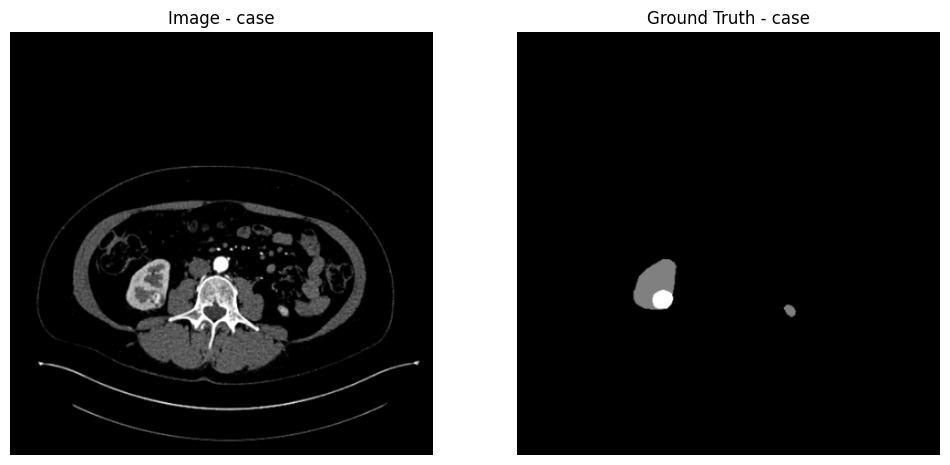

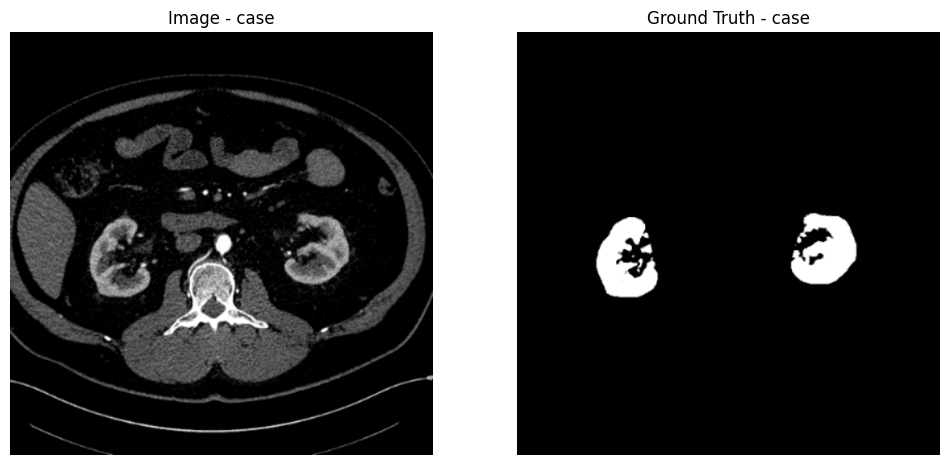

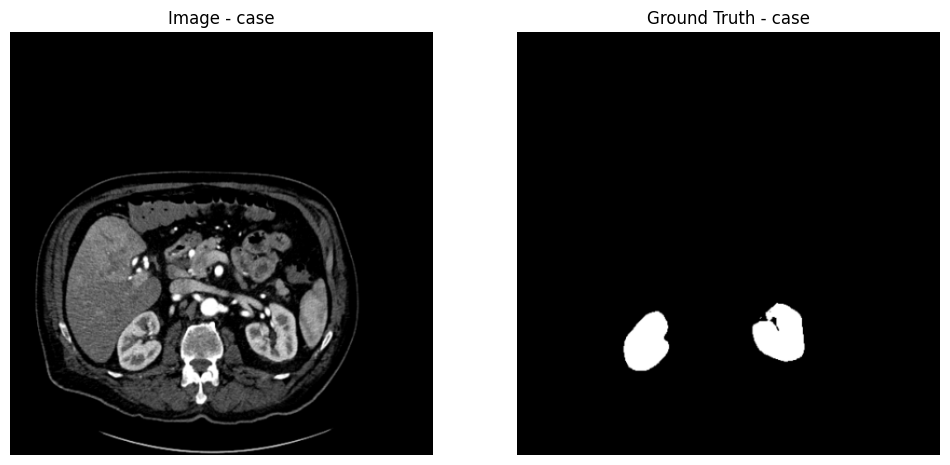

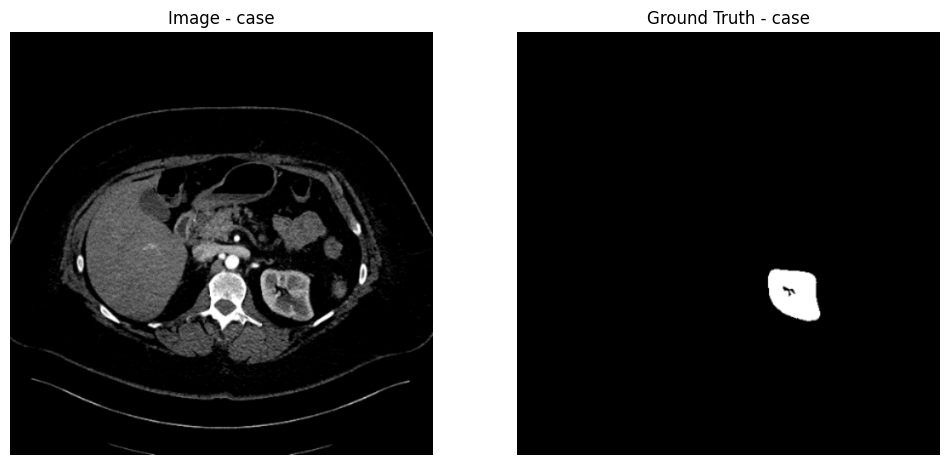

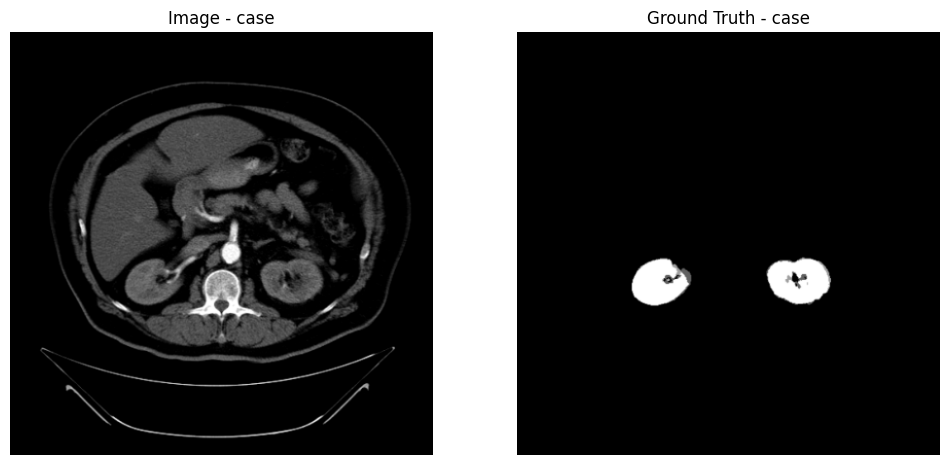

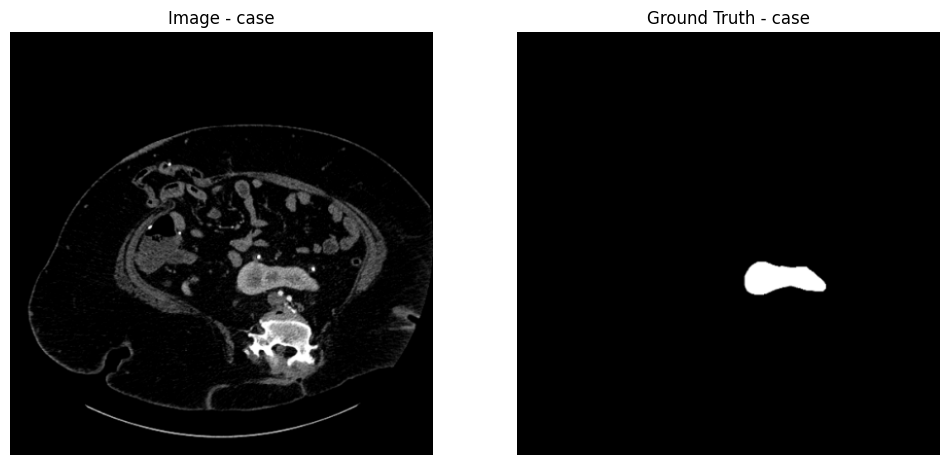

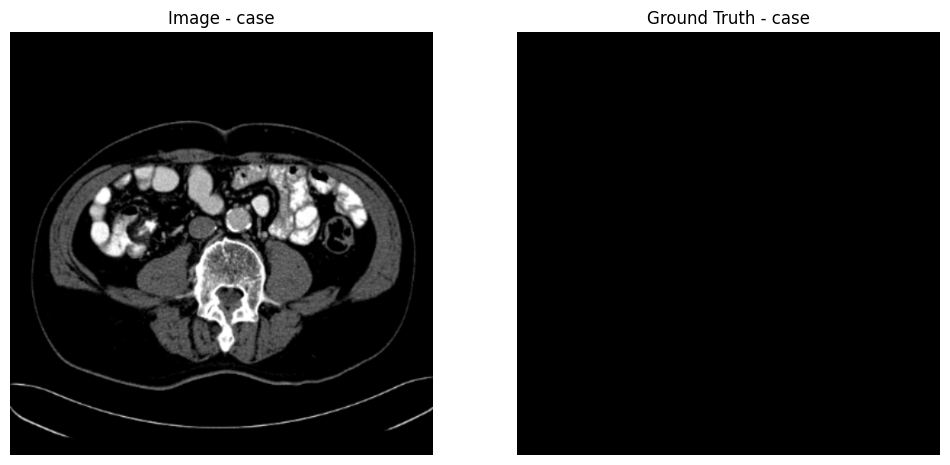

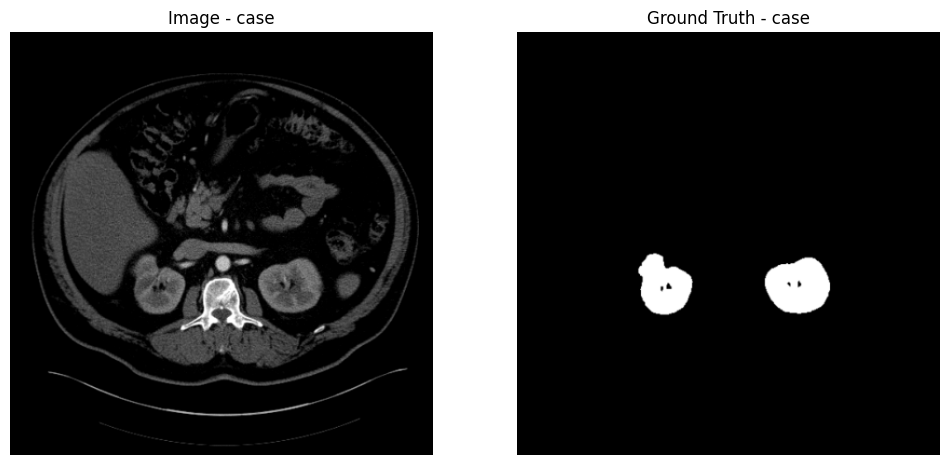

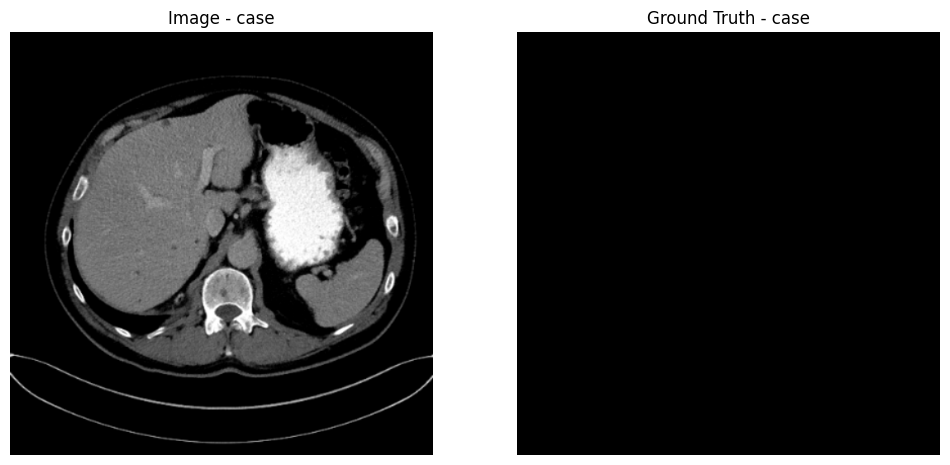

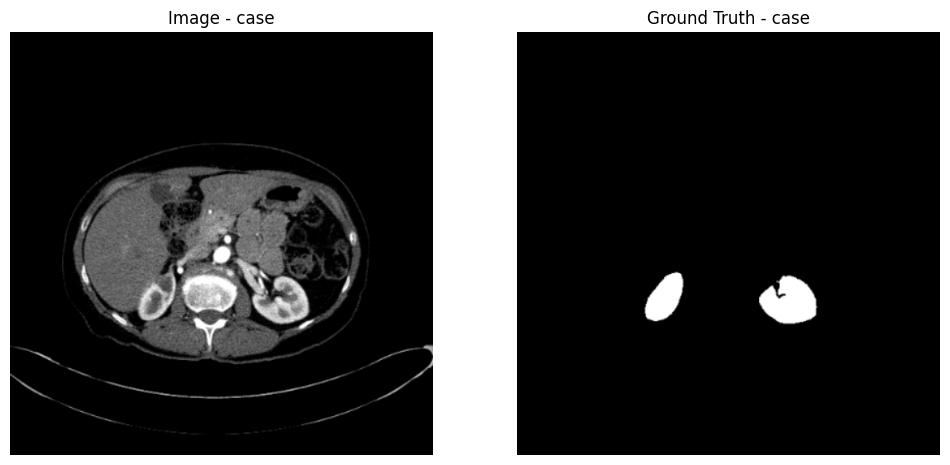

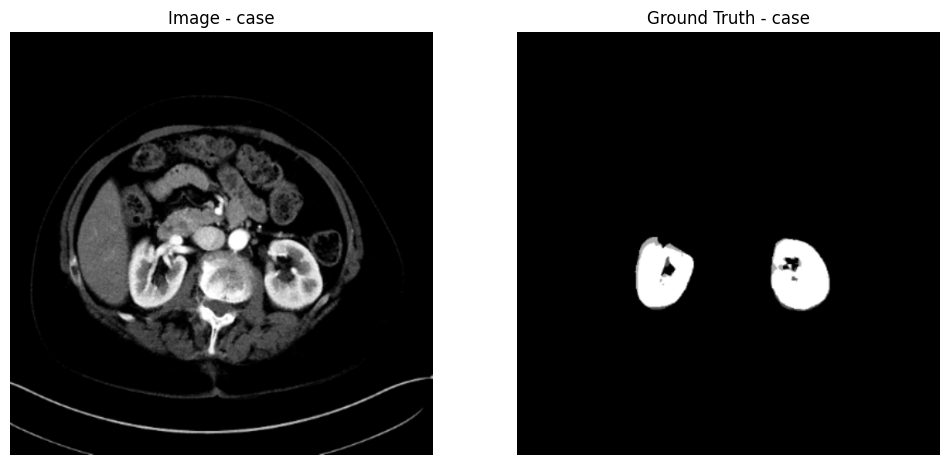

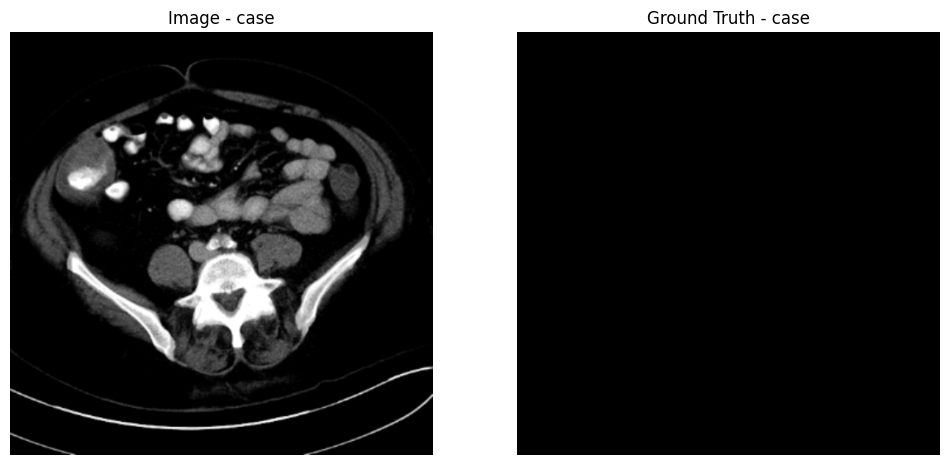

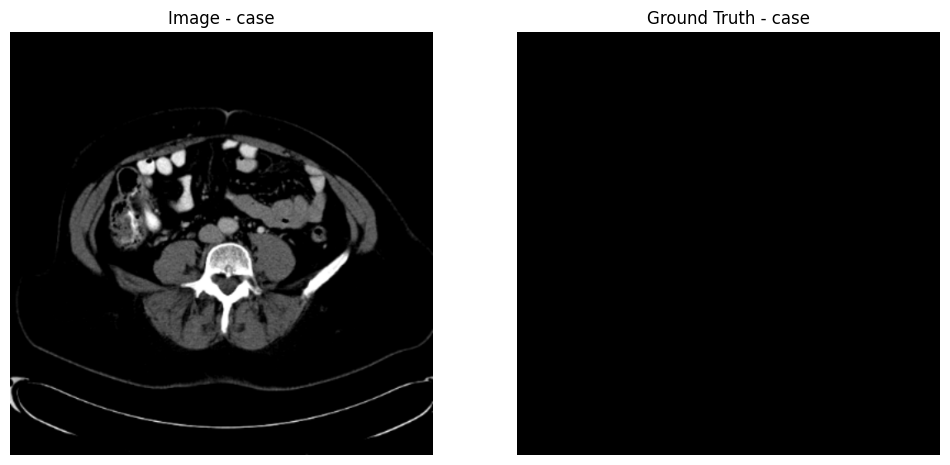

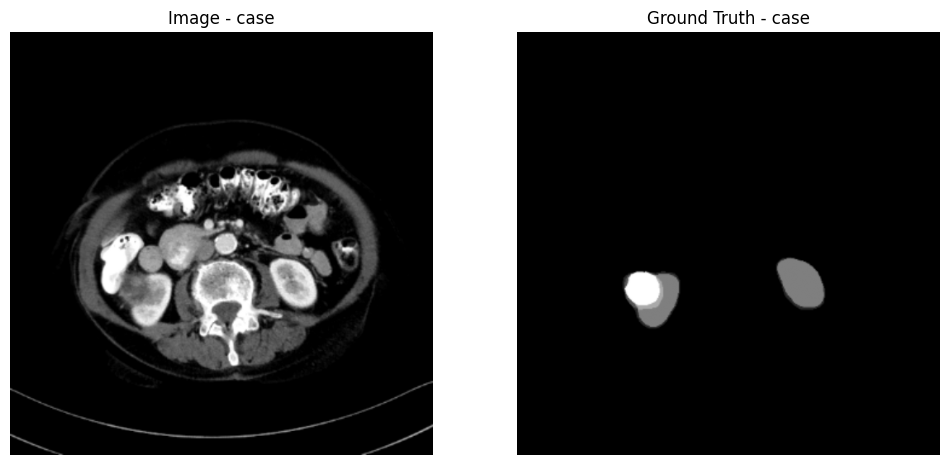

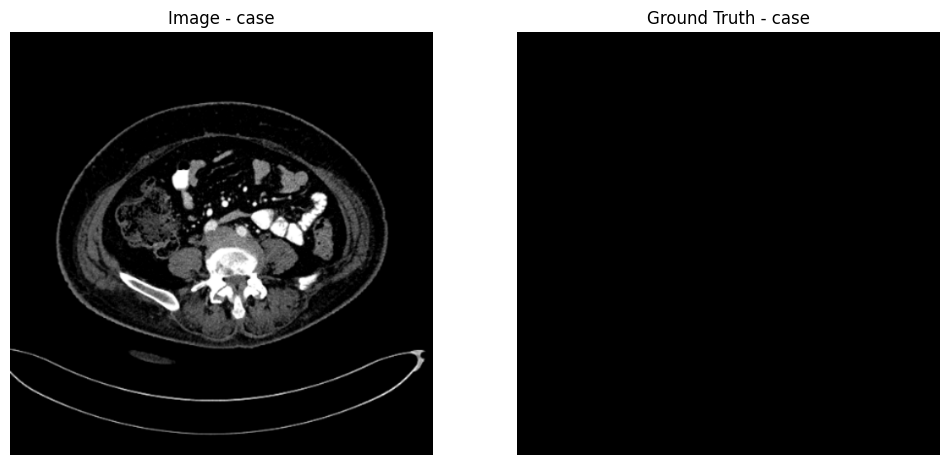

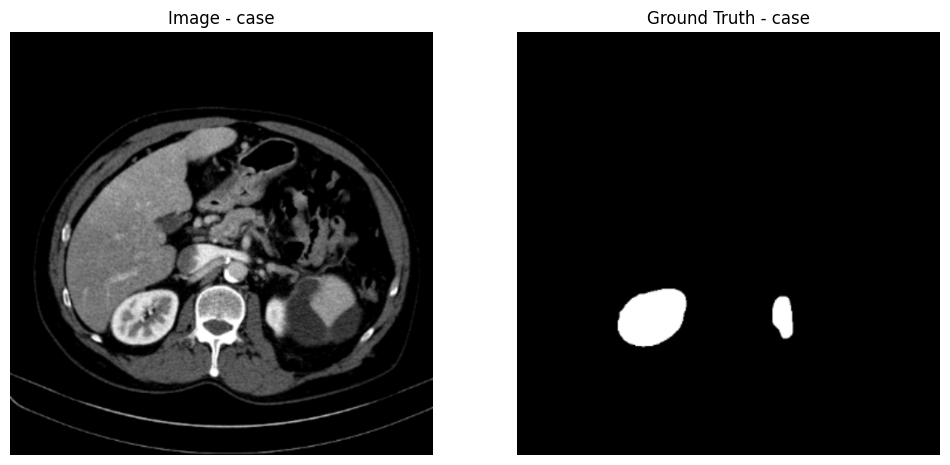

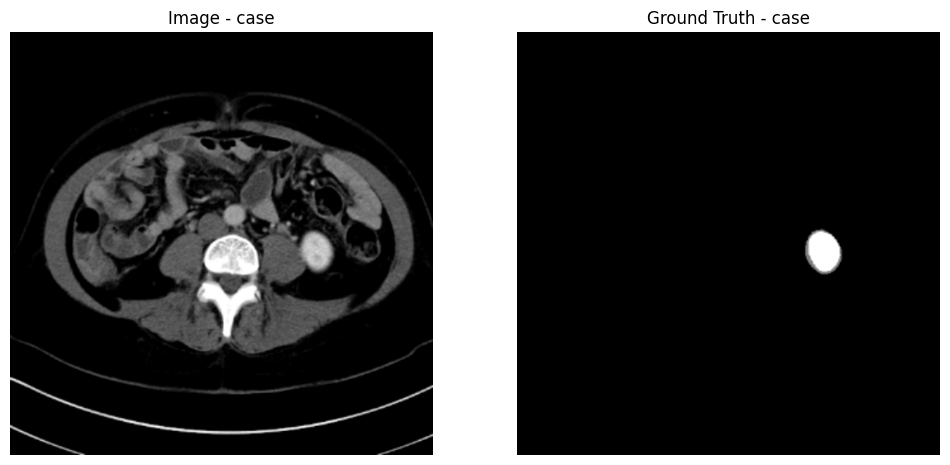

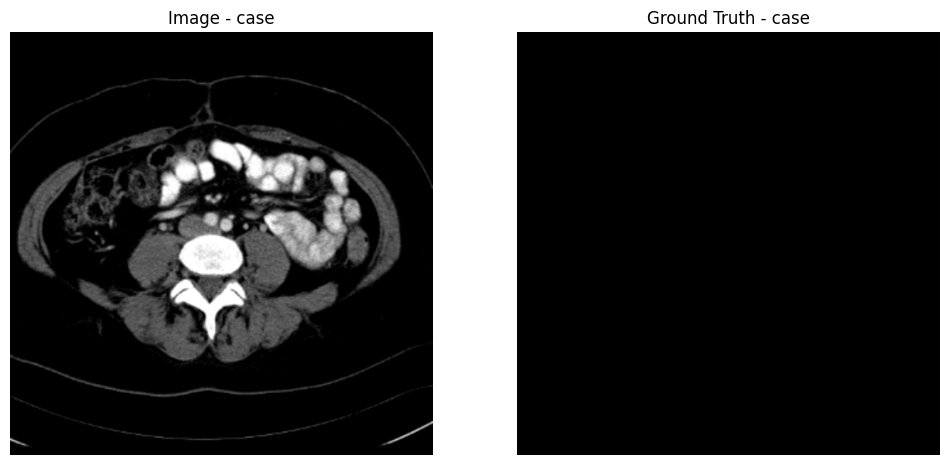

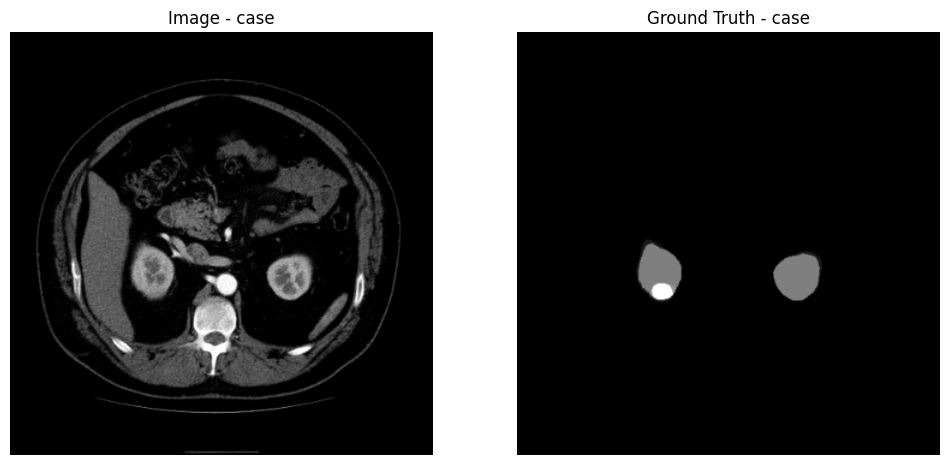

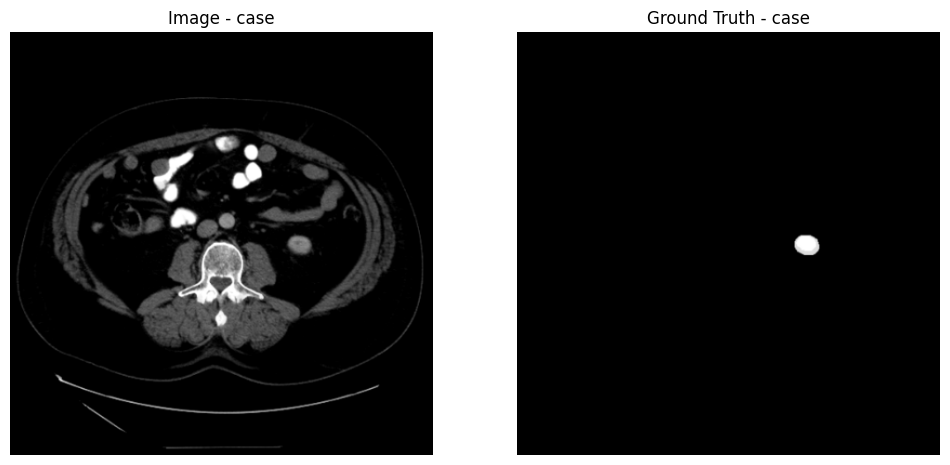

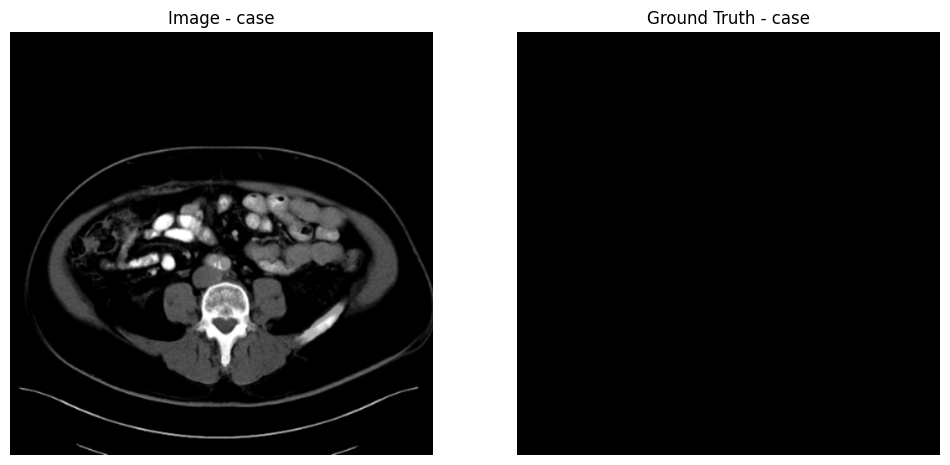

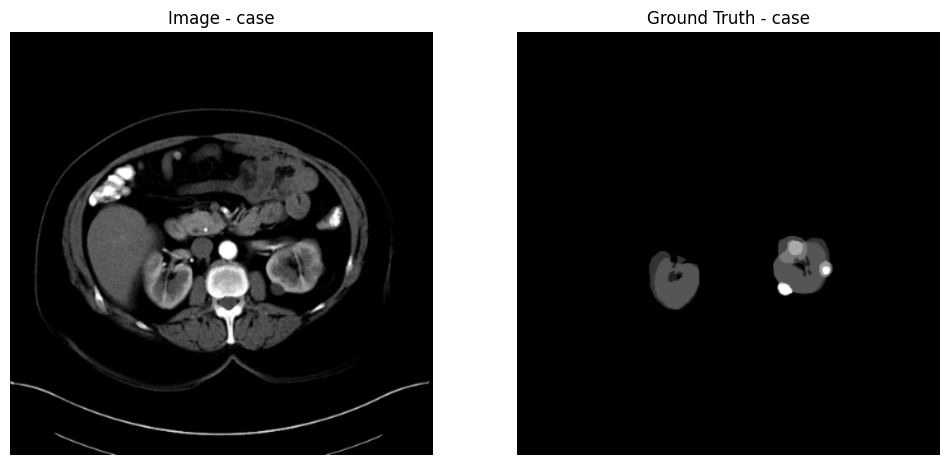

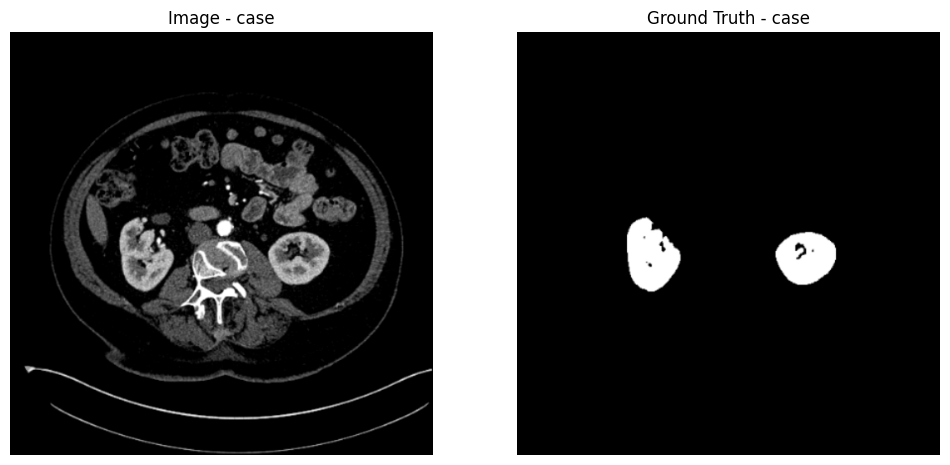

In [7]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Define paths
dataset_path = "D:/kits23/resampled_and_sliced_images"  # Path to your resampled images
segmentation_path = "D:/kits23/resampled_and_sliced_segmentation_files"  # Path to your resampled segmentation files

def visualize_side_by_side(image_file, segmentation_file, case_name):
    """
    Visualizes the resampled image and its corresponding resampled segmentation side by side.
    :param image_file: Path to the resampled image file.
    :param segmentation_file: Path to the resampled segmentation file.
    :param case_name: The case name for display.
    """
    # Load the image and segmentation files
    image_obj = nib.load(image_file)
    image_data = image_obj.get_fdata()

    segmentation_obj = nib.load(segmentation_file)
    segmentation_data = segmentation_obj.get_fdata()

    # Get the middle slice for visualization
    middle_slice_idx = image_data.shape[0] // 2
    image_slice = image_data[middle_slice_idx, :, :]
    segmentation_slice = segmentation_data[middle_slice_idx, :, :]

    # Create a side-by-side comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the image slice
    axes[0].imshow(image_slice, cmap="gray")
    axes[0].set_title(f"Image - {case_name}")
    axes[0].axis("off")

    # Plot the segmentation slice
    axes[1].imshow(segmentation_slice, cmap="gray")
    axes[1].set_title(f"Ground Truth - {case_name}")
    axes[1].axis("off")

    # Display the plot
    plt.show()

def compare_images_and_ground_truth(dataset_path, segmentation_path, num_cases=23):
    """
    Compare the resampled images and their corresponding resampled segmentation files side by side.
    :param dataset_path: Path to the folder containing the resampled images.
    :param segmentation_path: Path to the folder containing the resampled segmentation files.
    :param num_cases: Number of cases to process (default is 23).
    """
    # Get the list of image and segmentation files
    image_files = sorted(os.listdir(dataset_path))[:num_cases]
    segmentation_files = sorted(os.listdir(segmentation_path))[:num_cases]

    for image_file, segmentation_file in zip(image_files, segmentation_files):
        case_name = image_file.split("_")[0]  # Extract case name (e.g., 'case_00001')
        
        # Define the full paths to the image and segmentation files
        image_file_path = os.path.join(dataset_path, image_file)
        segmentation_file_path = os.path.join(segmentation_path, segmentation_file)

        # Visualize the images and ground truth side by side
        visualize_side_by_side(image_file_path, segmentation_file_path, case_name)

# Run the function to compare the first 23 cases
compare_images_and_ground_truth(dataset_path, segmentation_path)
